In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime as dt

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
mnist = pd.read_csv("../input/train.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
holdout = pd.read_csv("../input/test.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

print("Dimensions of train: {}".format(mnist.shape))
print("Dimensions of test: {}".format(holdout.shape))

Dimensions of train: (42000, 785)
Dimensions of test: (28000, 784)


In [3]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(mnist.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(mnist.isnull().sum()/mnist.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
pixel783,0,0.0
pixel267,0,0.0
pixel265,0,0.0
pixel264,0,0.0
pixel263,0,0.0


**Test-Train Split**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Putting feature variable to X
X = mnist.drop(['label'], axis=1)

X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Putting response variable to y
y = mnist['label']

y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

**Feature Scaling**

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005281,-0.006878,-0.00488,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00488,-0.005629,-0.009321,-0.0118,-0.016306,-0.020375,-0.025951,-0.029964,...,-0.139943,-0.12015,-0.09661,-0.075508,-0.053547,-0.037032,-0.023521,-0.013453,-0.006142,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006468,-0.015243,-0.020933,-0.02529,-0.030514,-0.041754,-0.04633,-0.051346,-0.055169,-0.060228,-0.056359,-0.051608,-0.042793,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005281,-0.006878,-0.00488,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00488,-0.005629,-0.009321,-0.0118,-0.016306,-0.020375,-0.025951,-0.029964,...,-0.139943,-0.12015,-0.09661,-0.075508,-0.053547,-0.037032,-0.023521,-0.013453,-0.006142,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006468,-0.015243,-0.020933,-0.02529,-0.030514,-0.041754,-0.04633,-0.051346,-0.055169,-0.060228,-0.056359,-0.051608,-0.042793,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005281,-0.006878,-0.00488,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00488,-0.005629,-0.009321,-0.0118,-0.016306,-0.020375,-0.025951,-0.029964,...,-0.139943,-0.12015,-0.09661,-0.075508,-0.053547,-0.037032,-0.023521,-0.013453,-0.006142,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006468,-0.015243,-0.020933,-0.02529,-0.030514,-0.041754,-0.04633,-0.051346,-0.055169,-0.060228,-0.056359,-0.051608,-0.042793,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005281,-0.006878,-0.00488,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00488,-0.005629,-0.009321,-0.0118,-0.016306,-0.020375,-0.025951,-0.029964,...,-0.139943,-0.12015,-0.09661,-0.075508,-0.053547,-0.037032,-0.023521,-0.013453,-0.006142,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006468,-0.015243,-0.020933,-0.02529,-0.030514,-0.041754,-0.04633,-0.051346,-0.055169,-0.060228,-0.056359,-0.051608,-0.042793,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005281,-0.006878,-0.00488,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00488,-0.005629,-0.009321,-0.0118,-0.016306,-0.020375,-0.025951,-0.029964,...,-0.139943,-0.12015,-0.09661,-0.075508,-0.053547,-0.037032,-0.023521,-0.013453,-0.006142,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006468,-0.015243,-0.020933,-0.02529,-0.030514,-0.041754,-0.04633,-0.051346,-0.055169,-0.060228,-0.056359,-0.051608,-0.042793,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0


In [10]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [11]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005281,-0.006878,-0.00488,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00488,-0.005629,-0.009321,-0.0118,-0.016306,-0.020375,-0.025951,-0.029964,...,-0.139943,-0.12015,-0.09661,-0.075508,-0.053547,-0.037032,-0.023521,-0.013453,-0.006142,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006468,-0.015243,-0.020933,-0.02529,-0.030514,-0.041754,-0.04633,-0.051346,-0.055169,-0.060228,-0.056359,-0.051608,-0.042793,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005281,-0.006878,-0.00488,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00488,-0.005629,-0.009321,-0.0118,-0.016306,-0.020375,-0.025951,-0.029964,...,-0.139943,-0.12015,-0.09661,-0.075508,-0.053547,-0.037032,-0.023521,-0.013453,-0.006142,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006468,-0.015243,-0.020933,-0.02529,-0.030514,-0.041754,-0.04633,-0.051346,-0.055169,-0.060228,-0.056359,-0.051608,-0.042793,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005281,-0.006878,-0.00488,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00488,-0.005629,-0.009321,-0.0118,-0.016306,-0.020375,-0.025951,-0.029964,...,-0.139943,-0.12015,-0.09661,-0.075508,-0.053547,-0.037032,-0.023521,-0.013453,-0.006142,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006468,-0.015243,-0.020933,-0.02529,-0.030514,-0.041754,-0.04633,-0.051346,-0.055169,-0.060228,-0.056359,-0.051608,-0.042793,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005281,-0.006878,-0.00488,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00488,-0.005629,-0.009321,-0.0118,-0.016306,-0.020375,-0.025951,-0.029964,...,-0.139943,-0.12015,-0.09661,-0.075508,-0.053547,-0.037032,-0.023521,-0.013453,-0.006142,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006468,-0.015243,-0.020933,-0.02529,-0.030514,-0.041754,-0.04633,-0.051346,-0.055169,-0.060228,-0.056359,-0.051608,-0.042793,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005281,-0.006878,-0.00488,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00488,-0.005629,-0.009321,-0.0118,-0.016306,-0.020375,-0.025951,-0.029964,...,-0.139943,-0.12015,-0.09661,-0.075508,-0.053547,-0.037032,-0.023521,-0.013453,-0.006142,-0.00488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006468,-0.015243,-0.020933,-0.02529,-0.030514,-0.041754,-0.04633,-0.051346,-0.055169,-0.060228,-0.056359,-0.051608,-0.042793,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0


**Showing the Images and Labels (MNIST)**

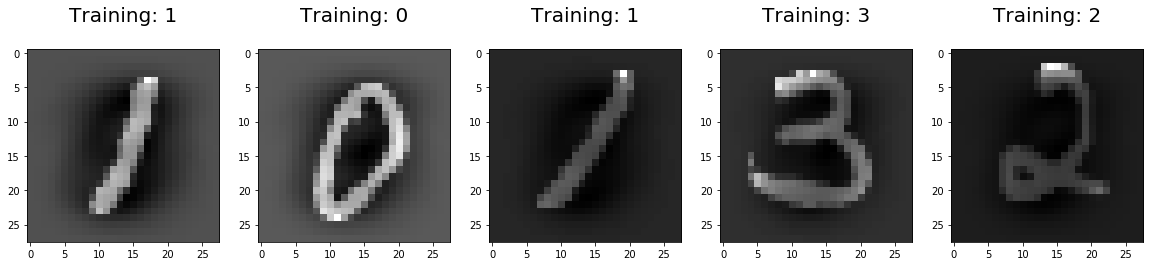

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

**PCA on the data**

In [13]:
X_train.shape
# We have 30 variables after creating our dummy variables for our categories

(29399, 784)

In [14]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [15]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [16]:
pca.n_components_

784

**Let's plot the principal components and try to make sense of them**
    **- We'll plot original features on the first 2 principal components as axe**

In [17]:
pca.components_

array([[ 9.95569366e-17,  2.22044605e-16,  6.93889390e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.67945979e-18, -5.89805982e-17, -5.55111512e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.15701389e-18,  9.02056208e-17, -2.22044605e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [-0.00000000e+00, -1.59228253e-01, -1.50793666e-01, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  2.38600944e-02, -1.51143908e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  8.27623618e-14,  9.06169289e-15, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [18]:
colnames = list(pd.DataFrame(X_train).columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,9.955694e-17,-2.679460e-18,0
1,2.220446e-16,-5.898060e-17,1
2,6.938894e-18,-5.551115e-17,2
3,-1.734723e-18,1.110223e-16,3
4,0.000000e+00,0.000000e+00,4


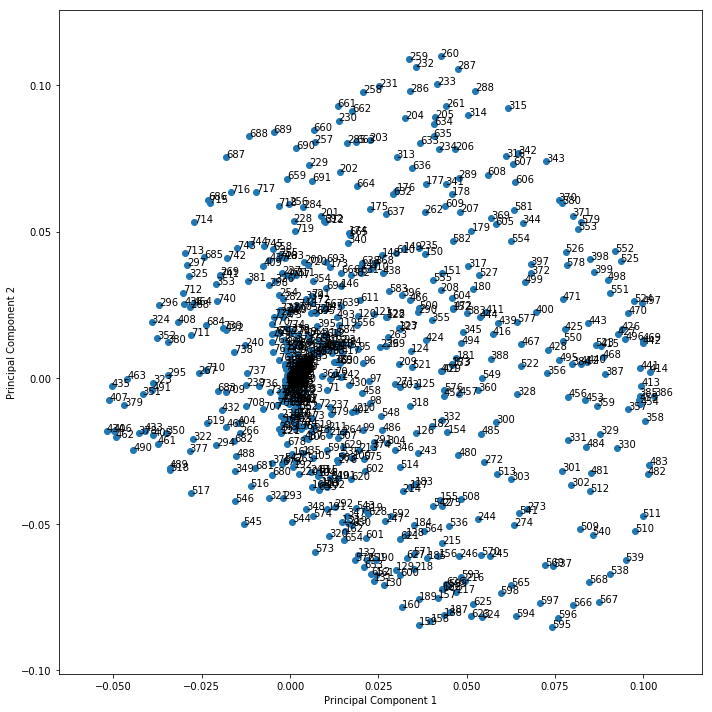

In [19]:
%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

***Looking at the screeplot to assess the number of needed principal components***

In [20]:
pd.options.display.float_format = '{:.2f}'.format
pca.explained_variance_ratio_

array([5.75569977e-02, 4.14074296e-02, 3.82710513e-02, 2.95285735e-02,
       2.59109754e-02, 2.26088588e-02, 1.96004602e-02, 1.78009553e-02,
       1.57390319e-02, 1.44674440e-02, 1.38510711e-02, 1.24776588e-02,
       1.13600239e-02, 1.11844606e-02, 1.04948996e-02, 1.03251930e-02,
       9.68823263e-03, 9.42225410e-03, 9.34714347e-03, 9.08071787e-03,
       8.58576383e-03, 8.20688236e-03, 7.78547897e-03, 7.54075032e-03,
       7.39573051e-03, 7.06732904e-03, 7.02933836e-03, 6.65611801e-03,
       6.44899343e-03, 6.29622162e-03, 6.23691799e-03, 6.05211877e-03,
       6.00434152e-03, 5.91437594e-03, 5.79200678e-03, 5.69898516e-03,
       5.63604011e-03, 5.53479508e-03, 5.38023387e-03, 5.36966219e-03,
       5.20797044e-03, 5.13473042e-03, 5.03433397e-03, 4.94799645e-03,
       4.84713916e-03, 4.79600979e-03, 4.73808796e-03, 4.60032665e-03,
       4.51624677e-03, 4.46776354e-03, 4.34529650e-03, 4.32009333e-03,
       4.26902495e-03, 4.22084539e-03, 4.21736988e-03, 4.11157703e-03,
      

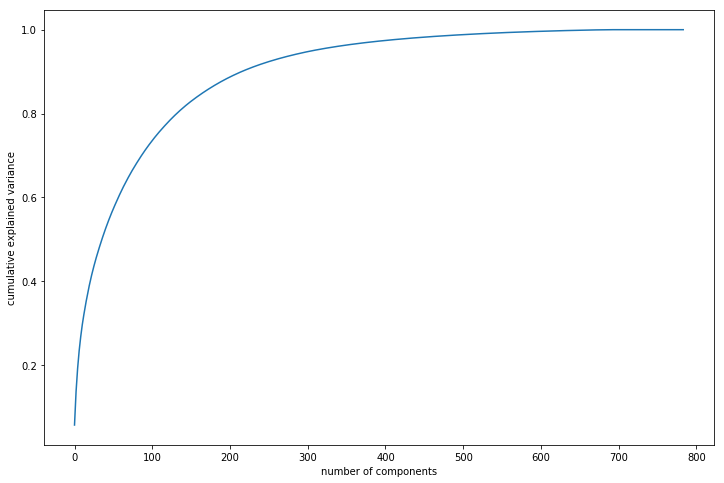

In [21]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [22]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [25]:
logisticRegr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
logisticRegr.predict(X_train_pca[0:10])

array([1, 0, 1, 3, 2, 3, 5, 0, 1, 9])

In [27]:
logisticRegr.predict(X_train_pca)

array([1, 0, 1, ..., 1, 7, 9])

In [28]:
score = logisticRegr.score(X_train_pca, y_train)
print(score)

0.9422769481955169


In [29]:
logisticRegr.predict(X_test_pca)

array([5, 0, 2, ..., 5, 7, 7])

In [30]:
score = logisticRegr.score(X_test_pca, y_test)
print(score)

0.905


In [31]:
X_train.shape
# We have 30 variables after creating our dummy variables for our categories

(29399, 784)

In [32]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca_last = PCA(0.90)

In [33]:
#Doing the PCA on the train data
pca_last.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca_last.n_components_

216

In [35]:
pca_last.components_

array([[-4.70773604e-19,  1.66533454e-16, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.29423822e-19,  8.32667268e-17,  2.77555756e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.22515850e-19, -1.66533454e-16,  2.77555756e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.42625413e-19, -1.73472348e-17, -4.33680869e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.58382888e-20, -4.88975180e-17, -4.09828421e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 7.48783276e-19,  2.25514052e-17, -1.73472348e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [36]:
colnames = list(pd.DataFrame(X_train).columns)
pcs_df = pd.DataFrame({'PC1':pca_last.components_[0],'PC2':pca_last.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.00,-0.00,0
1,0.00,0.00,1
2,-0.00,0.00,2
3,-0.00,0.00,3
4,-0.00,0.00,4


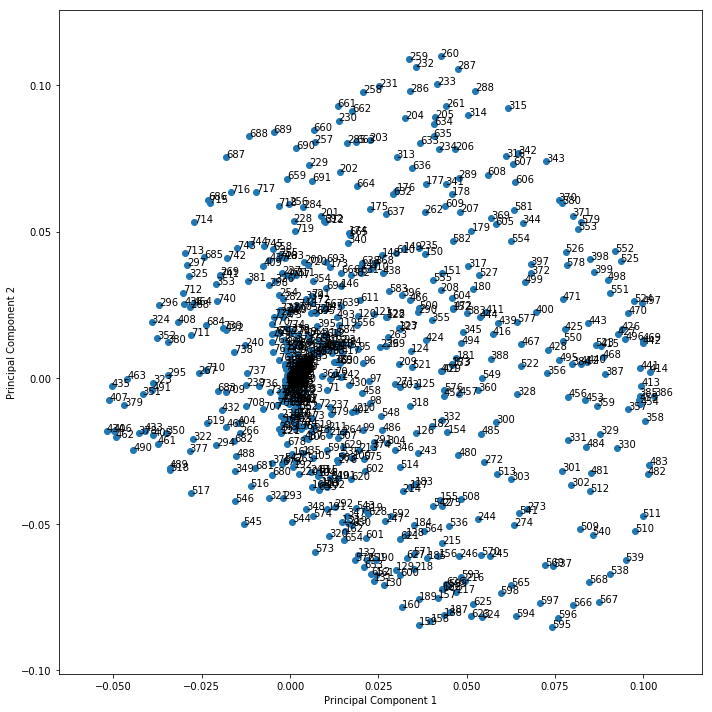

In [37]:
%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [38]:
X_train_pca = pca_last.transform(X_train)
X_test_pca = pca_last.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [41]:
model_pca = logisticRegr.fit(X_train_pca, y_train)
model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
logisticRegr.predict(X_train_pca[0:10])

array([1, 0, 1, 3, 2, 3, 5, 0, 1, 9])

In [43]:
predictions = logisticRegr.predict(X_train_pca)
predictions

array([1, 0, 1, ..., 1, 7, 9])

In [44]:
score = logisticRegr.score(X_train_pca, y_train)
print(score)

0.9264600836763155


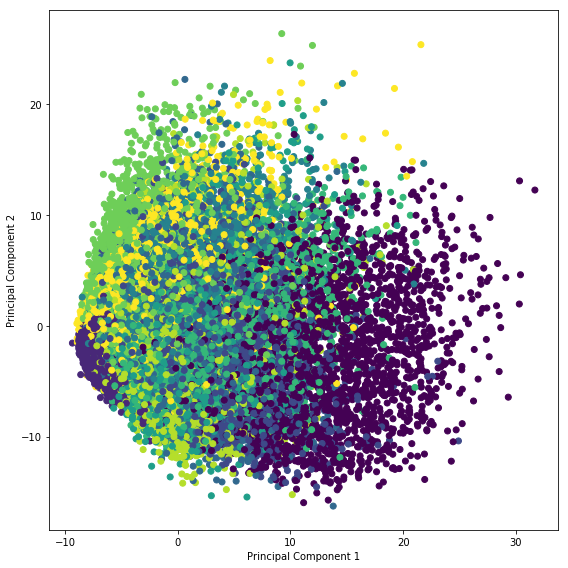

In [45]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [46]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.scatter(X_train_pca[:,2], X_train_pca[:,0], X_train_pca[:,1],zdir='z', s=20, marker = 'o', c=y_train)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
import statsmodels.api as sm
# Logistic regression model
logpca = sm.GLM(y_train,(sm.add_constant(X_train_pca)), family = sm.families.Binomial())
logpca.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  label   No. Observations:                29399
Model:                            GLM   Df Residuals:                    29182
Model Family:                Binomial   Df Model:                          216
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 09 Feb 2019   Deviance:                          nan
Time:                        19:10:48   Pearson chi2:                 2.68e+21
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.543e+18   3.91e+05   3.94e+12      0.000    1.54e+18    1.54e+18
x1         -5.181e+16   6.15e+04  -8.43e+11      0.000   -5.18e+16   -5.18e+16
x2          5.881e+16   7.25e+04   8.11e+11      0.000    5.88e+16    5.88e+16
x3         -8.307e+16   7.54e+04   -1.1e+12      0.000   -8.31e+16   -8.31e+16
x4          3.041e+15   8.58e+04   3.54e+10      0.000    3.04e+15    3.04e+15
x5         -9.863e+16   9.16e+04  -1.08e+12      0.000   -9.86e+16   -9.86e+16
x6          4.775e+16   9.81e+04   4.87e+11      0.000    4.78e+16    4.78e+16
x7         -3.034e+16   1.05e+05  -2.88e+11      0.000   -3.03e+16   -3.03e+16
x8         -8.757e+15   1.11e+05  -7.92e+10      0.000   -8.76e+15   -8.76e+15
x9          3.636e+16   1.18e+05   3.09e+11      0.000    3.64e+16    3.64e+16
x10        -1.423e+16   1.23e+05  -1.16e+11      0.000   -1.42e+16   -1.42e+16
x11         3.701e+15   1.25e+05   2.95e+10      0.000     3.7e+15     3.7e+15
x12         3.097e+16   1.32e+05   2.35e+11      0.000     3.1e+16     3.1e+16
x13        -1.312e+16   1.38e+05  -9.48e+10      0.000   -1.31e+16   -1.31e+16
x14         -3.53e+16   1.39e+05  -2.53e+11      0.000   -3.53e+16   -3.53e+16
x15         1.041e+16   1.44e+05   7.23e+10      0.000    1.04e+16    1.04e+16
x16         2.224e+16   1.45e+05   1.53e+11      0.000    2.22e+16    2.22e+16
x17        -2.448e+16    1.5e+05  -1.63e+11      0.000   -2.45e+16   -2.45e+16
x18         4.817e+15   1.52e+05   3.17e+10      0.000    4.82e+15    4.82e+15
x19         1.874e+16   1.53e+05   1.23e+11      0.000    1.87e+16    1.87e+16
x20        -4.215e+16   1.55e+05  -2.72e+11      0.000   -4.21e+16   -4.21e+16
x21         5.017e+15   1.59e+05   3.15e+10      0.000    5.02e+15    5.02e+15
x22          7.75e+16   1.63e+05   4.76e+11      0.000    7.75e+16    7.75e+16
x23         5.272e+16   1.67e+05   3.15e+11      0.000    5.27e+16    5.27e+16
x24         1.632e+16    1.7e+05   9.61e+10      0.000    1.63e+16    1.63e+16
x25         6.531e+16   1.71e+05   3.81e+11      0.000    6.53e+16    6.53e+16
x26         3.953e+16   1.75e+05   2.25e+11      0.000    3.95e+16    3.95e+16
x27        -3.648e+16   1.76e+05  -2.07e+11      0.000   -3.65e+16   -3.65e+16
x28        -2.842e+16   1.81e+05  -1.57e+11      0.000   -2.84e+16   -2.84e+16
x29        -2.434e+16   1.84e+05  -1.33e+11      0.000   -2.43e+16   -2.43e+16
x30        -5.074e+16   1.86e+05  -2.73e+11      0.000   -5.07e+16   -5.07e+16
x31         2.306e+15   1.87e+05   1.23e+10      0.000    2.31e+15    2.31e+15
x32         1.961e+16    1.9e+05   1.03e+11      0.000    1.96e+16    1.96e+16
x33         1.068e+16    1.9e+05   5.61e+10      0.000    1.07e+16    1.07e+16
x34         8.882e+15   1.92e+05   4.63e+10      0.000    8.88e+15    8.88e+15
x35         1.815e+16   1.94e+05   9.36e+10      0.000    1.81e+16    1.81e+16
x36        -3.738e+16   1.95e+05  -1.91e+11      0.000   -3.74e+16   -3.74e+16
x3

## Confusion Matrix (Digits Dataset)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [49]:
cm = metrics.confusion_matrix(y_train, predictions)
print(cm)

[[2824    0    3    3    3   14   20    1   20    2]
 [   0 3190   11   10    3    8    4    5   25    4]
 [  12   19 2712   47   29   22   29   37   66    4]
 [   8   13   81 2730    2   90   13   26   61   31]
 [   6   11   16    5 2700    9   12    6   20   83]
 [  30    9   20   92   24 2283   50    9   61   39]
 [  19    4   11    2   17   40 2780    0   14    0]
 [   7   12   29    8   19    5    0 2937    6   94]
 [  23   55   29   71   11   79   16   13 2484   46]
 [  15   12    6   57   75   24    1   91   23 2597]]


## Confusion Matrix in Seaborn

In [50]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Calculating accuracy

In [51]:
print(metrics.accuracy_score(y_train, predictions))

0.9264600836763155


## Calculating recall

In [52]:
recall = np.diag(cm) / np.sum(cm, axis = 1)
recall

array([0.97716263, 0.97852761, 0.91098421, 0.89361702, 0.94142259,
       0.87237295, 0.96293731, 0.94225217, 0.87866997, 0.89520855])

In [53]:
from sklearn.metrics import precision_score, recall_score

In [54]:
recall_score(y_train, predictions,average='macro')

0.9253154998599648

## Calculating precision

In [55]:
precision = np.diag(cm) / np.sum(cm, axis = 0)
precision

array([0.95923913, 0.9593985 , 0.9294037 , 0.90247934, 0.93652445,
       0.88694639, 0.95042735, 0.93984   , 0.89352518, 0.89551724])

In [56]:
precision_score(y_train, predictions,average='macro')

0.9253301278986772

In [57]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_train, predictions)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.95923913 0.9593985  0.9294037  0.90247934 0.93652445 0.88694639
 0.95042735 0.93984    0.89352518 0.89551724]
recall: [0.97716263 0.97852761 0.91098421 0.89361702 0.94142259 0.87237295
 0.96293731 0.94225217 0.87866997 0.89520855]
fscore: [0.96811793 0.96886864 0.92010178 0.89802632 0.93896714 0.87959931
 0.95664143 0.94104454 0.88603531 0.89536287]
support: [2890 3260 2977 3055 2868 2617 2887 3117 2827 2901]


## overall measures of precision

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2890
           1       0.96      0.98      0.97      3260
           2       0.93      0.91      0.92      2977
           3       0.90      0.89      0.90      3055
           4       0.94      0.94      0.94      2868
           5       0.89      0.87      0.88      2617
           6       0.95      0.96      0.96      2887
           7       0.94      0.94      0.94      3117
           8       0.89      0.88      0.89      2827
           9       0.90      0.90      0.90      2901

   micro avg       0.93      0.93      0.93     29399
   macro avg       0.93      0.93      0.93     29399
weighted avg       0.93      0.93      0.93     29399



## Predictions on the test sample

In [59]:
predict_test = logisticRegr.predict(X_test_pca)
predict_test

array([5, 0, 2, ..., 5, 7, 7])

In [60]:
score = logisticRegr.score(X_test_pca, y_test)
print(score)

0.9135714285714286


In [61]:
print(metrics.accuracy_score(y_test, predict_test))

0.9135714285714286


In [62]:
recall_score(y_test, predict_test,average='macro')

0.912408184326319

In [63]:
precision_score(y_test, predict_test,average='macro')

0.9125356775142259

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1242
           1       0.95      0.98      0.96      1424
           2       0.91      0.89      0.90      1199
           3       0.89      0.89      0.89      1296
           4       0.91      0.92      0.91      1204
           5       0.89      0.86      0.88      1178
           6       0.94      0.96      0.95      1250
           7       0.92      0.92      0.92      1284
           8       0.86      0.85      0.86      1236
           9       0.89      0.88      0.89      1287

   micro avg       0.91      0.91      0.91     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.91      0.91      0.91     12600



## Preparing Holdout Data

In [65]:
holdout.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
holdout.shape

(28000, 784)

In [67]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(holdout.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(holdout.isnull().sum()/holdout.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
pixel783,0,0.00
pixel268,0,0.00
pixel266,0,0.00
pixel265,0,0.00
pixel264,0,0.00


## Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
holdout = scaler.transform(holdout)

pd.DataFrame(holdout).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.01,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.01,-0.01,-0.01,-0.02,-0.02,-0.03,-0.03,...,-0.14,-0.12,-0.10,-0.08,-0.05,-0.04,-0.02,-0.01,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.02,-0.02,-0.03,-0.03,-0.04,-0.05,-0.05,-0.06,-0.06,-0.06,-0.05,-0.04,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.01,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.01,-0.01,-0.01,-0.02,-0.02,-0.03,-0.03,...,-0.14,-0.12,-0.10,-0.08,-0.05,-0.04,-0.02,-0.01,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.02,-0.02,-0.03,-0.03,-0.04,-0.05,-0.05,-0.06,-0.06,-0.06,-0.05,-0.04,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.01,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.01,-0.01,-0.01,-0.02,-0.02,-0.03,-0.03,...,-0.14,-0.12,-0.10,-0.08,-0.05,-0.04,-0.02,-0.01,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.02,-0.02,-0.03,-0.03,-0.04,-0.05,-0.05,-0.06,-0.06,-0.06,-0.05,-0.04,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.01,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.01,-0.01,-0.01,-0.02,-0.02,-0.03,-0.03,...,-0.14,-0.12,-0.10,-0.08,-0.05,-0.04,-0.02,-0.01,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.02,-0.02,-0.03,-0.03,-0.04,-0.05,-0.05,-0.06,-0.06,-0.06,-0.05,-0.04,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.01,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.01,-0.01,-0.01,-0.02,-0.02,-0.03,-0.03,...,-0.14,-0.12,-0.10,-0.08,-0.05,-0.04,-0.02,-0.01,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.02,-0.02,-0.03,-0.03,-0.04,-0.05,-0.05,-0.06,-0.06,-0.06,-0.05,-0.04,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00


In [70]:
holdout_pca = pca_last.transform(holdout)
pd.DataFrame(holdout_pca).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
0,11.74,-4.57,2.24,5.26,-0.73,7.79,1.55,0.88,-4.83,-1.96,0.96,-5.13,0.14,-2.55,-2.02,-2.02,4.17,-0.41,-2.03,0.08,-6.84,-4.64,-2.77,-2.23,0.95,-0.61,1.73,1.77,4.31,-1.38,-1.05,0.63,0.42,-0.11,-1.06,0.30,1.20,-1.23,0.32,1.28,...,-0.92,0.28,-0.29,0.50,-0.99,1.53,-0.68,0.67,-0.79,2.06,-0.54,-0.29,0.46,-0.05,0.20,1.11,-0.86,1.37,0.32,0.92,0.76,0.34,-0.22,0.73,-0.76,0.20,-1.34,-0.08,-1.35,1.26,0.27,-0.78,0.17,-0.16,0.08,-0.64,-0.98,0.54,0.95,1.44
1,18.32,0.46,-5.72,1.39,11.99,-3.59,-6.11,-0.26,-0.03,-6.10,5.50,1.05,-0.93,-1.60,-1.18,-1.20,-2.00,-0.69,1.84,-2.87,0.22,4.83,2.28,-1.26,0.81,-1.16,-0.54,-0.28,-1.04,1.60,1.89,-0.38,-0.69,1.06,-1.30,2.41,0.26,0.75,0.27,1.68,...,0.16,-0.11,0.12,1.41,0.59,-0.85,-0.05,-0.60,1.09,0.18,-1.12,0.88,0.66,0.40,-0.55,0.46,0.19,-1.17,-0.67,-0.04,-0.86,-0.06,0.61,-0.13,-0.11,0.11,-0.03,0.28,-0.51,-0.92,0.26,-0.20,0.27,-0.00,-0.50,0.53,1.20,1.01,0.86,-0.91
2,-5.28,-0.49,-0.96,0.59,2.21,1.89,0.35,-2.57,0.99,1.70,-5.41,-3.42,0.59,-0.09,-1.47,-0.24,-1.05,3.25,1.25,-0.22,-0.40,3.23,0.36,-0.46,0.13,3.07,-0.39,0.24,0.35,-0.87,1.33,1.02,-0.02,-1.55,2.44,1.54,-1.15,-0.07,0.11,0.59,...,-0.62,0.65,0.14,0.66,0.93,-0.63,0.39,0.12,0.46,0.37,0.31,0.19,0.36,0.47,0.12,-0.04,-0.98,0.66,-0.12,1.31,0.08,0.75,-0.81,-0.74,1.24,0.17,0.34,-0.06,-0.06,-0.05,1.13,-0.34,1.26,0.57,-1.64,-0.52,-0.20,-0.33,-0.22,-0.35
3,-3.37,-0.23,-3.57,6.26,0.21,1.71,0.90,0.44,-1.53,1.47,-3.57,0.32,2.70,2.36,-2.61,-1.01,1.36,0.46,-0.38,0.90,-2.40,-1.37,-0.64,-0.06,0.52,-0.08,-2.71,0.02,1.52,1.32,-0.62,-0.90,0.80,1.11,0.79,0.20,-1.17,0.39,0.15,1.55,...,-0.33,0.23,1.26,0.05,-0.83,0.59,0.02,0.93,0.60,0.30,-0.74,-0.09,-0.50,-0.02,0.36,-0.28,-0.10,1.06,0.62,0.90,-0.36,-0.37,0.19,-0.99,0.03,0.36,-0.14,-0.35,0.29,-0.66,0.31,0.33,-1.06,-1.03,-0.94,-0.24,-0.02,-0.65,0.23,0.94
4,-1.64,-3.13,7.42,0.89,-1.55,-0.45,0.57,2.45,-6.23,-0.76,-0.02,3.43,0.16,2.92,4.59,-2.40,-2.09,-0.59,-0.45,0.70,2.76,4.28,2.15,-2.29,-0.23,-2.23,1.00,0.59,-0.33,0.90,0.34,0.00,-0.44,-0.44,-1.07,2.11,-1.10,0.23,1.58,-0.03,...,0.11,-0.40,0.20,0.65,-1.51,0.28,0.25,0.39,0.75,0.40,-0.45,0.32,-1.25,-0.81,0.03,0.55,-0.18,-0.44,0.26,0.56,0.24,0.96,-0.26,0.47,-0.68,-0.16,-0.70,0.60,1.14,-0.03,0.61,-0.11,0.11,0.67,-0.27,0.66,-0.14,0.12,0.01,-0.68


In [71]:
predict_holdout = logisticRegr.predict(holdout_pca)
predict_holdout

array([2, 0, 9, ..., 3, 9, 2])

## Creating Kaggle submission file

In [72]:
holdout_ids = np.arange(1,holdout.shape[0]+1)
submission_df = {"ImageId": holdout_ids,"Label": predict_holdout}
submission = pd.DataFrame(submission_df)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3


In [73]:
submission.to_csv("submission.csv",index=False)